In [1]:
data(iris)

In [2]:
a <- subset(iris, Species == "setosa" | Species == "versicolor")
a$Species <- factor(a$Species)
str(a)

'data.frame':	100 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 2 levels "setosa","versicolor": 1 1 1 1 1 1 1 1 1 1 ...


In [3]:
m <- glm(Species ~ Sepal.Length, family = binomial, data = a)
summary(m)


Call:
glm(formula = Species ~ Sepal.Length, family = binomial, data = a)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.05501  -0.47395  -0.02829   0.39788   2.32915  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -27.831      5.434  -5.122 3.02e-07 ***
Sepal.Length    5.140      1.007   5.107 3.28e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.629  on 99  degrees of freedom
Residual deviance:  64.211  on 98  degrees of freedom
AIC: 68.211

Number of Fisher Scoring iterations: 6


In [4]:
fitted(m)[c(1:5, 96:100)]

1          2          3          4          5         96         97 
0.16579367 0.06637193 0.02479825 0.01498061 0.10623680 0.81282396 0.81282396 
        98         99        100 
0.98268360 0.16579367 0.81282396

In [5]:
f <- fitted(m)
as.numeric(a$Species)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [6]:
ifelse(f > 0.5, 1, 0) == as.numeric(a$Species) - 1

1     2     3     4     5     6     7     8     9    10    11    12    13 
 TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
 TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
 TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
 TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
 TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
 TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
 TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE 
   92    93    94    95    96    97    98    99   100 
 TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE

In [7]:
is_correct <- ifelse(f > 0.5, 1, 0) == as.numeric(a$Species) - 1
sum(is_correct)

[1] 89

In [8]:
sum(is_correct) / NROW(is_correct)

[1] 0.89

In [9]:
predict(m, newdata = a[c(1, 50, 51, 100), ], type = "response")

1        50        51       100 
0.1657937 0.1062368 0.9997116 0.8128240

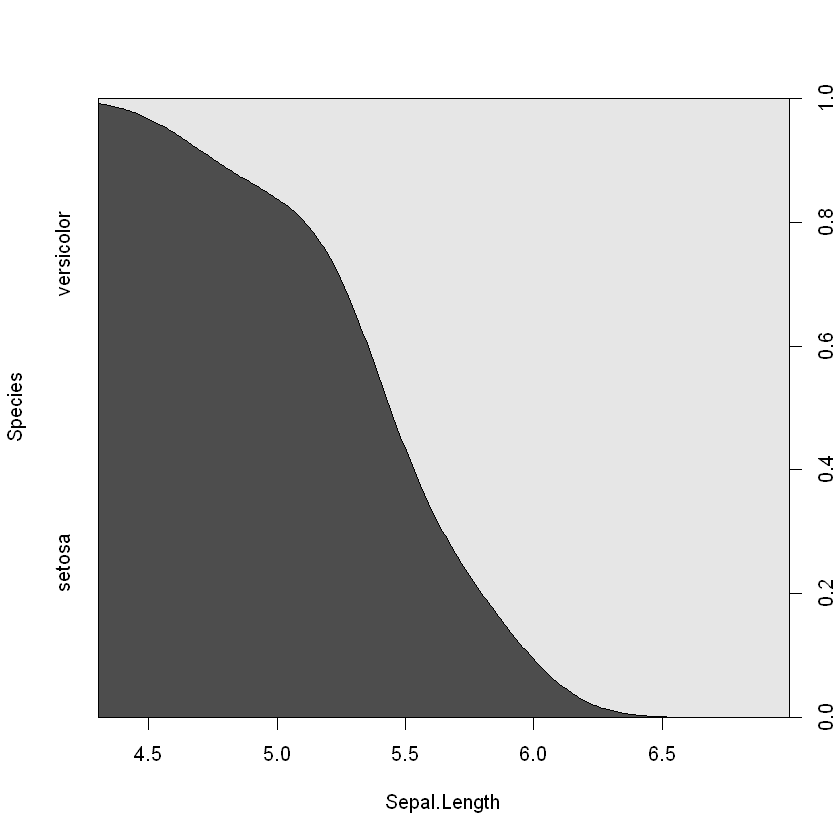

In [10]:
cdplot(Species ~ Sepal.Length, data = a)

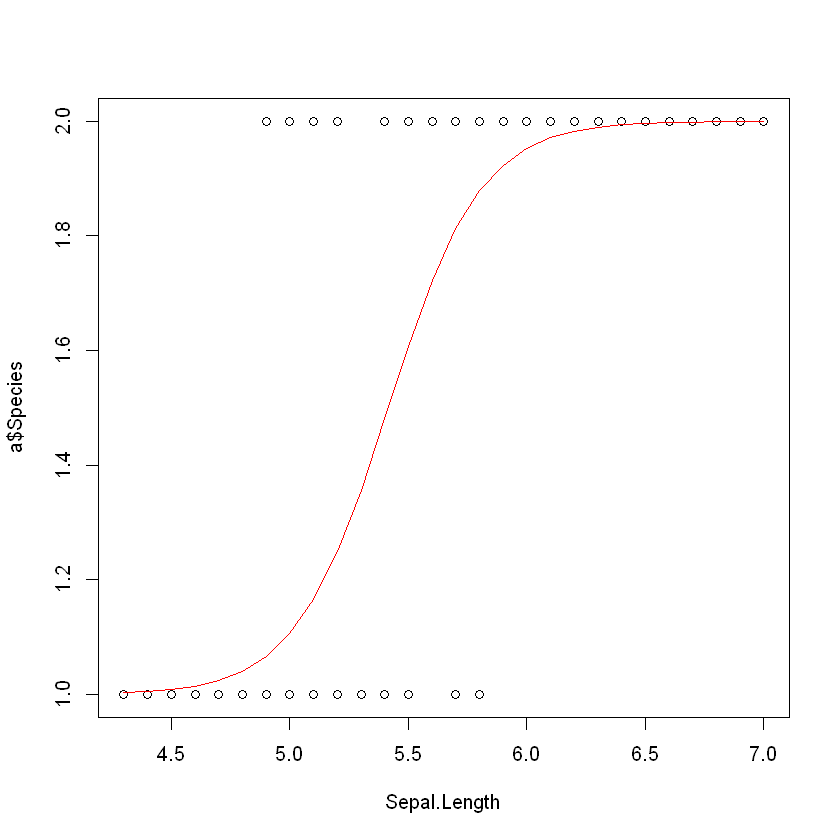

In [11]:
plot(a$Sepal.Length, a$Species, xlab = "Sepal.Length")
x = seq(min(a$Sepal.Length), max(a$Sepal.Length), 0.1)
lines(x, 1+(1/(1+(1/exp(-27.831+5.140*x)))), type = "l", col = "red")

# 다중 로지스틱 회귀

In [12]:
library(nnet)
(m <- multinom(Species ~ ., data = iris))

Warning message:
"package 'nnet' was built under R version 3.6.2"

# weights:  18 (10 variable)
initial  value 164.791843 
iter  10 value 16.177348
iter  20 value 7.111438
iter  30 value 6.182999
iter  40 value 5.984028
iter  50 value 5.961278
iter  60 value 5.954900
iter  70 value 5.951851
iter  80 value 5.950343
iter  90 value 5.949904
iter 100 value 5.949867
final  value 5.949867 
stopped after 100 iterations


Call:
multinom(formula = Species ~ ., data = iris)

Coefficients:
           (Intercept) Sepal.Length Sepal.Width Petal.Length Petal.Width
versicolor    18.69037    -5.458424   -8.707401     14.24477   -3.097684
virginica    -23.83628    -7.923634  -15.370769     23.65978   15.135301

Residual Deviance: 11.89973 
AIC: 31.89973 

In [13]:
head(fitted(m))

setosa,versicolor,virginica
1.0000000,1.526406e-09,2.716417e-36
0.9999996,3.536476e-07,2.883729e-32
1.0000000,4.443506e-08,6.103424e-34
0.9999968,3.163905e-06,7.117010e-31
1.0000000,1.102983e-09,1.289946e-36
1.0000000,3.521573e-10,1.344907e-35


In [14]:
predict(m, newdata = iris[c(1, 50, 51, 100), ], type = "class")

[1] setosa     setosa     versicolor versicolor
Levels: setosa versicolor virginica

In [15]:
predict(m, newdata = iris[c(1, 50, 51, 100), ], type = "prob")

,setosa,versicolor,virginica
1,1.000000e+00,1.526406e-09,2.716417e-36
50,1.000000e+00,1.503286e-08,1.297787e-34
51,2.427101e-07,9.999877e-01,1.201699e-05
100,2.333746e-08,9.999976e-01,2.420920e-06
